# Principal Component Analysis

# 1 PCA: 2-dimensional Toy Data 
# 1.a) 

In [117]:

import numpy as np
import matplotlib.pyplot as plt
import math as m
import csv
from mpl_toolkits.mplot3d import Axes3D

(10, 2)


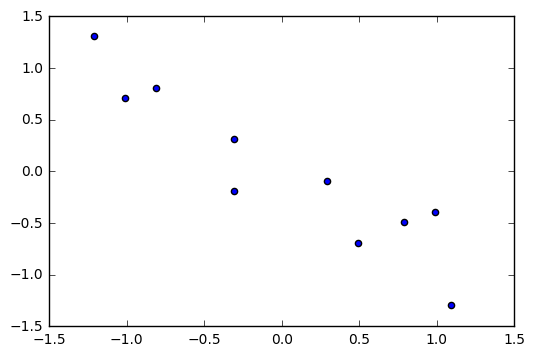

In [118]:
# a) Load the dataset, center & make scatter plot

# load data
Data = np.genfromtxt("pca-data-2d.dat", skip_header=False,dtype='float')

# center data
mean = np.mean(Data, axis=0)
centered = Data - mean
print (centered.shape)
plt.scatter(centered[:,0],centered[:,1])
plt.show()

# 1.b)

In [119]:
# b) Determine the Principal Component Directions (PCs) and make another scatter plot of the
# same data points in the coordinate system spanned by the 2 PCs.

# 1. Cov Matrix
C = np.cov(centered.T)
# 2. get eigenvectors and eigenvalues of cov matrix, w values, v vectors
w,v = np.linalg.eigh(C)

# 3.plot data points in the coordinate systems spanned by the 2 PCs.

In [120]:
#we switch the vectors ,because the second one has a higher eigenvalue
evectors = v[::-1]
evalues = w[::-1]

centered_pca = np.zeros(centered.shape)

for i in range(centered.shape[0]):
    centered_pca[i,0] = evectors[0].T.dot(centered[i])
    centered_pca[i,1] = evectors[1].T.dot(centered[i])
    


first PC:
[-0.73517866  0.6778734 ]
eigenvalue of first PC:
1.28402771217
second PC:
[-0.6778734  -0.73517866]
eigenvalue of second PC:
0.0490833989383


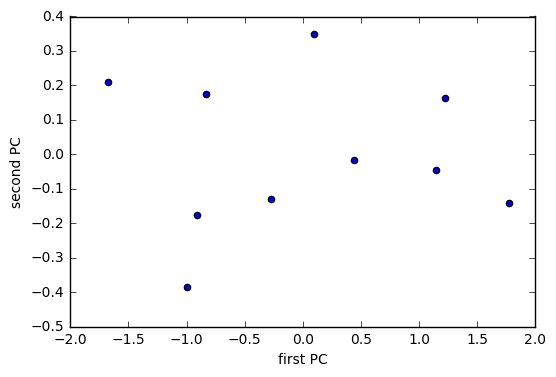

In [121]:
print('first PC:')
print(evectors[0])
print('eigenvalue of first PC:')
print(evalues[0])
print('second PC:')
print(evectors[1])
print('eigenvalue of second PC:')
print(evalues[1])
plt.xlabel('first PC')
plt.ylabel('second PC')
plt.scatter(centered_pca[:,0],centered_pca[:,1])
plt.show()


# 1.c(i)

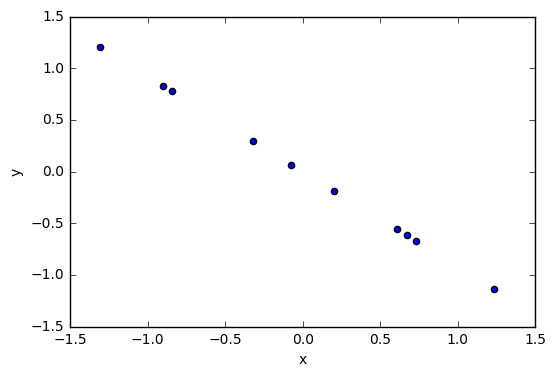

In [122]:
reconstruction1 = np.zeros(centered.shape)

for i in range(centered.shape[0]):
    reconstruction1[i] = evectors[0]*centered_pca[i,0]
  


plt.xlabel('x')
plt.ylabel('y')
plt.scatter(reconstruction1[:,0],reconstruction1[:,1])
plt.show()

# 1.c(ii)

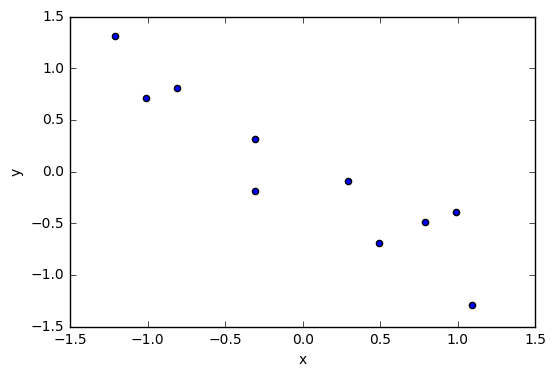

In [123]:
reconstruction2 = np.zeros(centered.shape)

for i in range(centered.shape[0]):
    reconstruction2[i] = evectors[0]*centered_pca[i,0] + evectors[1]*centered_pca[i,1]
    
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(reconstruction2[:,0],reconstruction2[:,1])
plt.show()

# 2.a

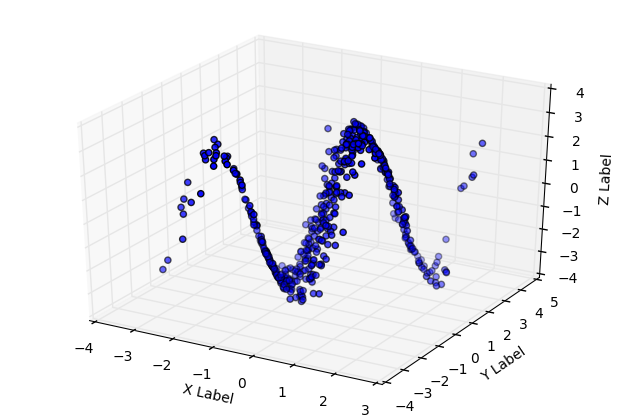

In [124]:
# a) Load the dataset, center & make scatter plot

# load data
Data = np.genfromtxt("pca-data-3d.txt",delimiter=',', skip_header=True,dtype='float')
# center data
mean = np.mean(Data, axis=0)
centered = Data - mean

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(centered[:,0], centered[:,1], zs=centered[:,2])
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.show()

# 2.b

In [125]:
C = np.cov(centered.T)
# 2. get eigenvectors and eigenvalues of cov matrix, w values, v vectors
w,v = np.linalg.eigh(C)

evectors = v[::-1]
evalues = w[::-1]

centered_pca = np.zeros(centered.shape)

for i in range(centered.shape[0]):
    centered_pca[i,0] = evectors[0].T.dot(centered[i])
    centered_pca[i,1] = evectors[1].T.dot(centered[i])
    centered_pca[i,2] = evectors[2].T.dot(centered[i])



coordinate system spanned by PC1 and PC2


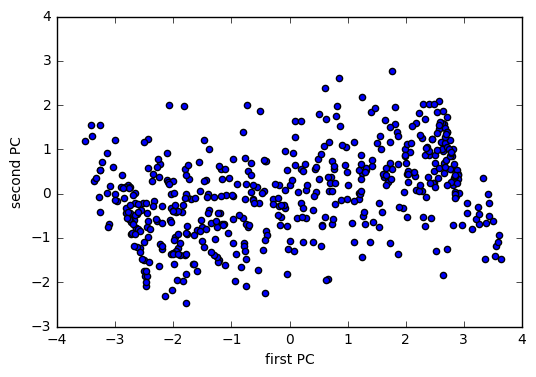

In [126]:
print('coordinate system spanned by PC1 and PC2')
plt.xlabel('first PC')
plt.ylabel('second PC')
plt.scatter(centered_pca[:,0],centered_pca[:,1])
plt.show()

coordinate system spanned by PC1 and PC3


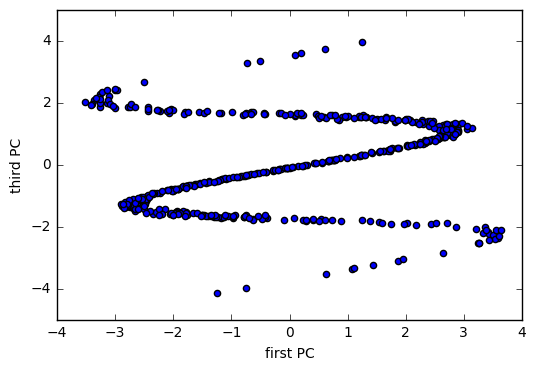

In [127]:
print('coordinate system spanned by PC1 and PC3')
plt.xlabel('first PC')
plt.ylabel('third PC')
plt.scatter(centered_pca[:,0],centered_pca[:,2])
plt.show()

coordinate system spanned by PC2 and PC3


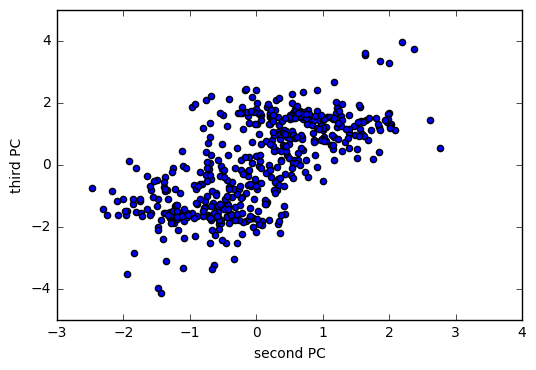

In [128]:
print('coordinate system spanned by PC2 and PC3')
plt.xlabel('second PC')
plt.ylabel('third PC')
plt.scatter(centered_pca[:,1],centered_pca[:,2])
plt.show()

# 2.c(i)

reconstruction by using only PC1


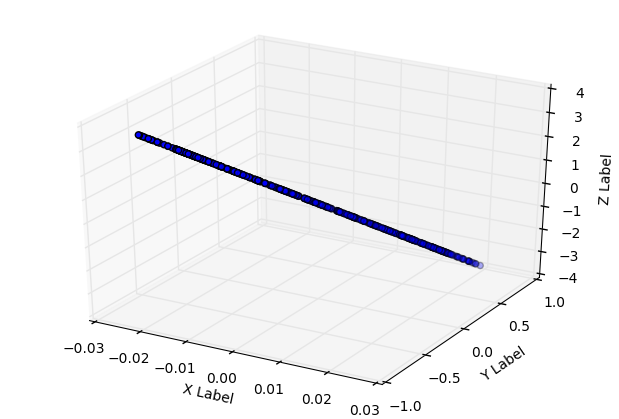

In [129]:
reconstruction1 = np.zeros(centered.shape)

for i in range(centered.shape[0]):
    reconstruction1[i] = evectors[0]*centered_pca[i,0]
  

print('reconstruction by using only PC1')
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(reconstruction1[:,0], reconstruction1[:,1], zs=reconstruction1[:,2])
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.show()

# 2.c(ii)

reconstruction by using PC1 and PC2


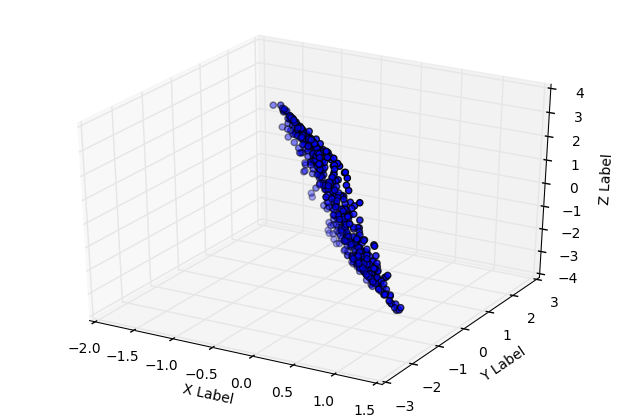

In [130]:
reconstruction2 = np.zeros(centered.shape)

for i in range(centered.shape[0]):
    reconstruction2[i] = evectors[0]*centered_pca[i,0] + evectors[1]*centered_pca[i,1]
print('reconstruction by using PC1 and PC2')
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(reconstruction2[:,0], reconstruction2[:,1], zs=reconstruction2[:,2])
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.show()

# 2.c(iii)

reconstruction by using all PCs 


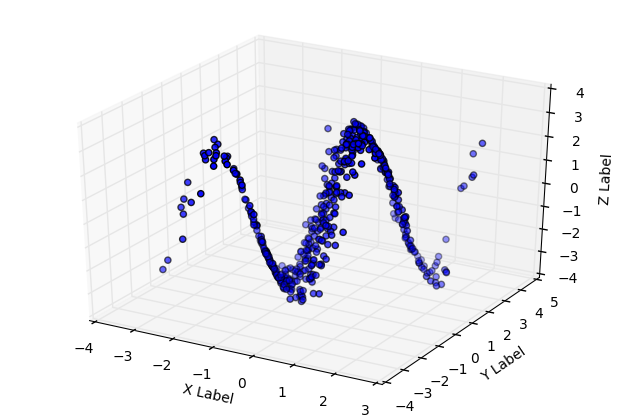

In [131]:
reconstruction3 = np.zeros(centered.shape)

for i in range(centered.shape[0]):
    reconstruction3[i] = evectors[0]*centered_pca[i,0] + evectors[1]*centered_pca[i,1] + evectors[2]*centered_pca[i,2]
print('reconstruction by using all PCs ')  
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(reconstruction3[:,0], reconstruction3[:,1], zs=reconstruction3[:,2])
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.show()

# It seems like we need all three PCs to get a good reconstruction of the data

# 3.a)

In [132]:
# load data
Data = np.genfromtxt("expDat.txt", delimiter=',', skip_header=True,dtype='float')
# skip first row ("1","2",..)
expDat = Data[:,1:]

mean = np.mean(expDat, axis=0)
centered = expDat - mean
C = np.cov(centered.T)
w,v = np.linalg.eigh(C)

evectors = v[::-1]
evalues = w[::-1]

centered_pca = np.zeros(centered.shape)

for i in range(centered.shape[0]):
    for j in range(centered.shape[1]):
        centered_pca[i,j] = evectors[j].T.dot(centered[i])
   
 

# 3.b)

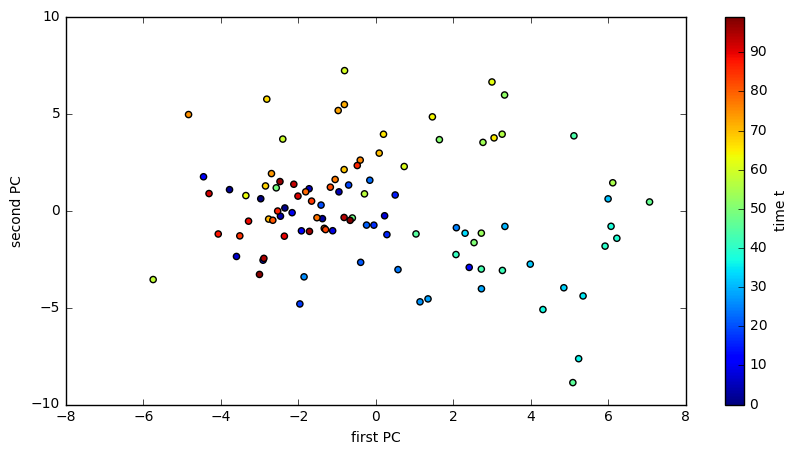

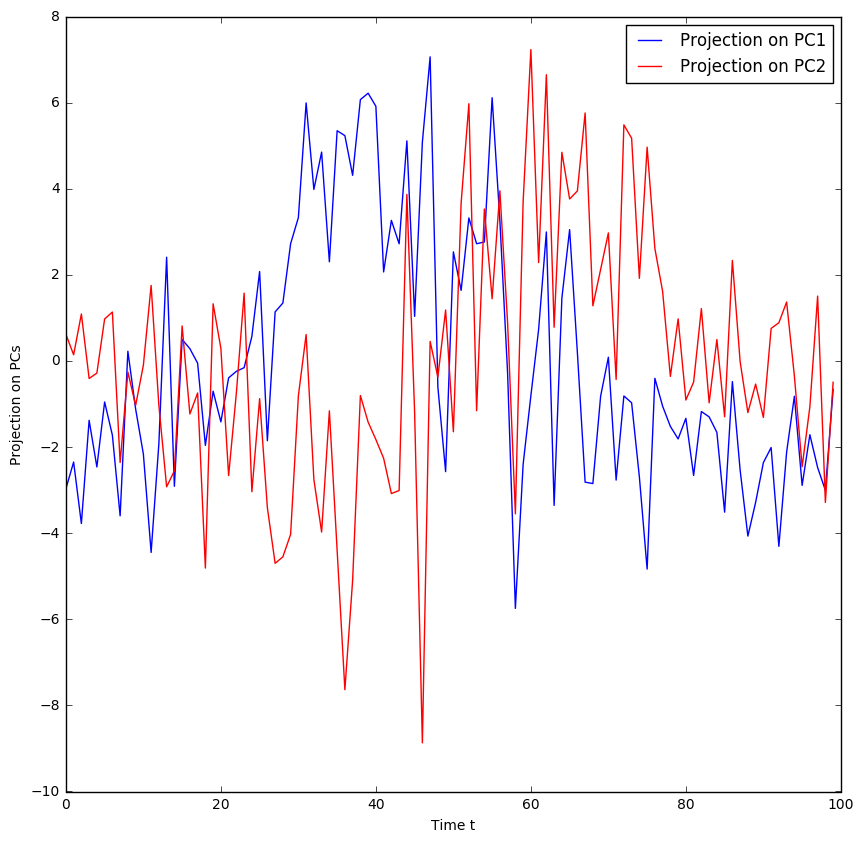

In [133]:
import matplotlib.cm as cm
cmap = cm.jet
reconstruction = np.zeros(centered.shape)

for i in range(centered.shape[0]):
    reconstruction[i] = evectors[0]*centered_pca[i,0] + evectors[1]*centered_pca[i,1]



t = np.arange(centered_pca.shape[0])
plt.figure(figsize=(10,5))
plt.xlabel('first PC')
plt.ylabel('second PC')

plt.scatter(centered_pca[:,0],centered_pca[:,1],c=t,cmap=cmap)
plt.colorbar(label='time t')
plt.show()


c = cmap(t)
plt.figure(figsize=(10,10))
plt.xlabel('Time t')
plt.ylabel('Projection on PCs')
plt.xlabel('Time t')
plt.ylabel('Projection on PCs')

plt.plot(t,centered_pca[:,0],label='Projection on PC1')

plt.plot(t,centered_pca[:,1],color='red',label='Projection on PC2')

 
plt.legend()
plt.show()




# 3.c)

In [134]:
expDat_copy = np.copy(expDat)

for i in range(expDat_copy.shape[1]):
    np.random.shuffle(expDat_copy[:,i])
    
    



 


# 3.d)

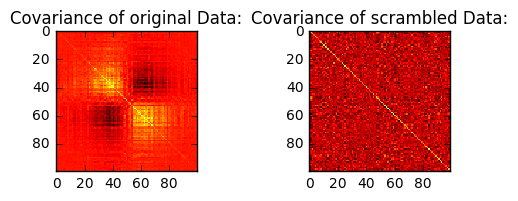

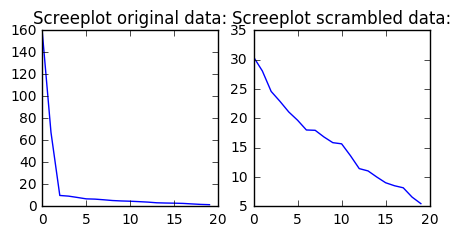

In [167]:
cov_original = np.cov(expDat)


plt.subplot(2,2,1)
plt.title('Covariance of original Data:')
plt.imshow(cov_original, cmap='hot', interpolation='nearest')






cov_copy = np.cov(expDat_copy)
plt.subplot(2,2,2)
plt.title('Covariance of scrambled Data:')
plt.imshow(cov_copy, cmap='hot', interpolation='nearest')




centered = expDat - mean
C = np.cov(centered.T)
w,v = np.linalg.eigh(C)
evalues = w[::-1]
t = np.arange(evalues.shape[0])
plt.figure(figsize=(5,5))
plt.subplot(2,2,3)
plt.title('Screeplot original data:')
plt.plot(t,evalues)


centered = expDat_copy - mean
C = np.cov(centered.T)
w,v = np.linalg.eigh(C)
evalues = w[::-1]
t = np.arange(evalues.shape[0])
plt.subplot(2,2,4)
plt.title('Screeplot scrambled data:')
plt.plot(t,evalues)

# In the first plot you can see two big yellow patches, which means that there are correlations in the data.

# After the shuffling of the data within each column, there correlation  is gone because you destroy the structure in the data.

# 3.e) Shuffling the data in each row, will have the same effect, it destroys the structure in the data.

# 4.a)

In [11]:
import numpy as np
import matplotlib.image as mpimg
import random
import matplotlib.pyplot as plt


b_matrix = np.zeros([5000,256])

k = 0
for i in range(10):
    img=mpimg.imread("imgpca/b" + str(i+1) + ".jpg")
    for j in range(500):
            x=random.randint(0, img.shape[0]-16)
            y=random.randint(0, img.shape[1]-16)
            patch=img[x:x+16, y:y+16]
            b_matrix[k,:] = patch.flatten()
            k = k + 1
      
n_matrix = np.zeros([5000,256])

k = 0
for i in range(10):
    img=mpimg.imread("imgpca/n" + str(i+1) + ".jpg")
    for j in range(500):
            x=random.randint(0, img.shape[0]-16)
            y=random.randint(0, img.shape[1]-16)
            patch=img[x:x+16, y:y+16]
            n_matrix[k,:] = patch.flatten()
            k = k + 1


# 4.b)

In [12]:
mean_b = np.mean(b_matrix,axis= 0)

centered = b_matrix - mean_b
C = np.cov(centered.T)
w,v = np.linalg.eigh(C)
evectors_b = v[::-1]
evalues_b = w[::-1]

In [13]:
mean_n = np.mean(n_matrix,axis= 0)

centered = n_matrix - mean_n
C = np.cov(centered.T)
w,v = np.linalg.eigh(C)
evectors_n = v[::-1]
evalues_n = w[::-1]

Eigenvectors for the building-picture-patches-matrix:


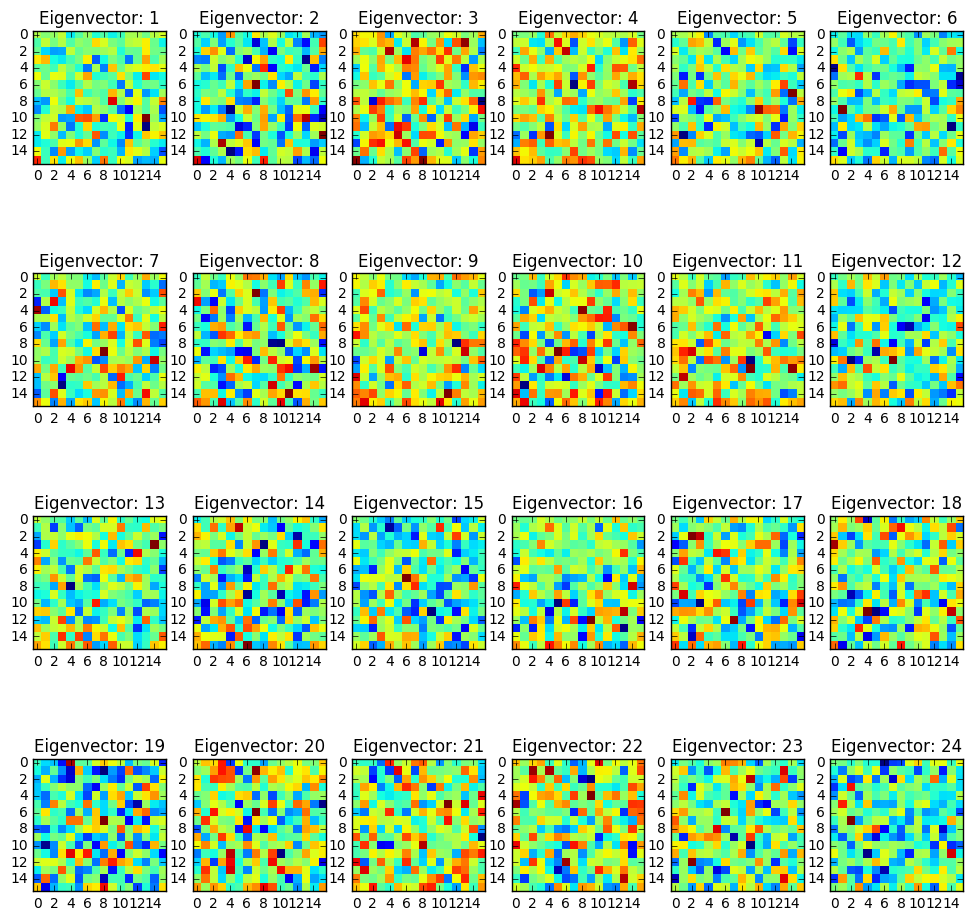

In [113]:
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt





#plt.imshow(xxx, interpolation='nearest')
plt.figure(figsize=(12, 12))


print('Eigenvectors for the building-picture-patches-matrix:')

for i in range(24):
    plt.subplot(4,6,i+1)
    plt.imshow(evectors_b[i].reshape(16,16), interpolation='nearest')
    plt.title('Eigenvector: ' + str(i + 1))
plt.show()

Eigenvectors for the nature-picture-patches-matrix:


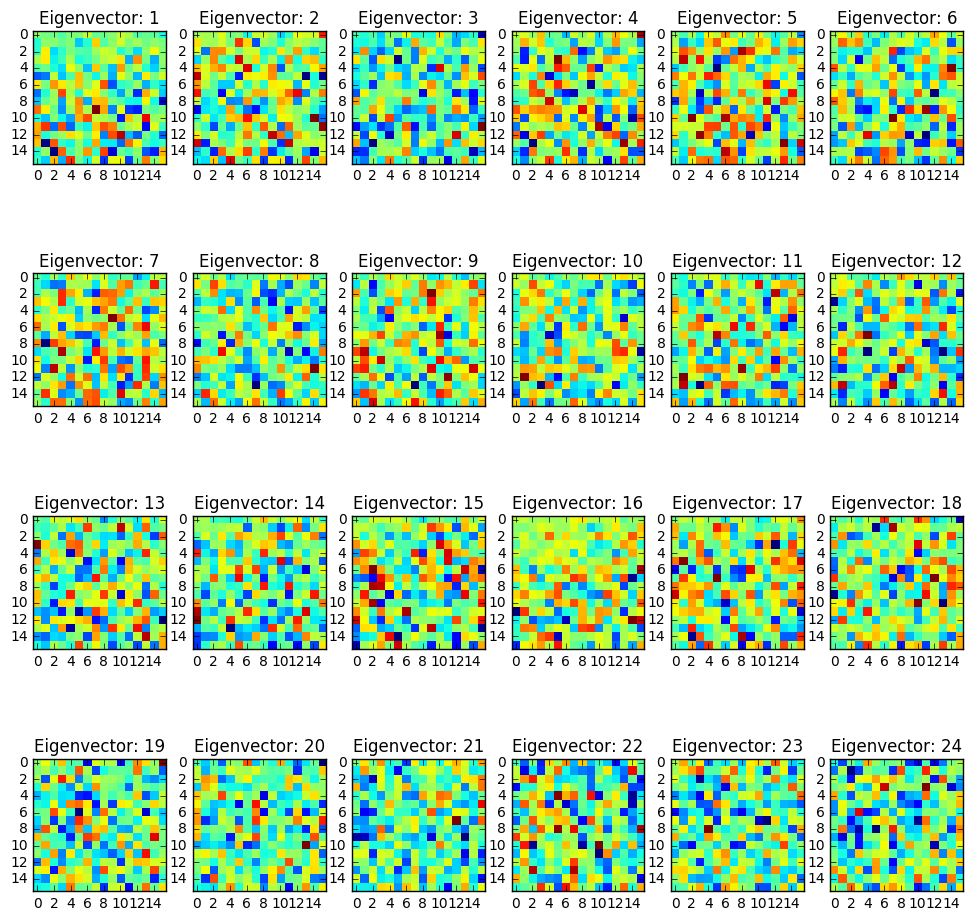

In [115]:
print('Eigenvectors for the nature-picture-patches-matrix:')

plt.figure(figsize=(12, 12))

for i in range(24):
    plt.subplot(4,6,i+1)
    plt.imshow(evectors_n[i].reshape(16,16), interpolation='nearest')
    plt.title('Eigenvector: ' + str(i + 1))
plt.show()

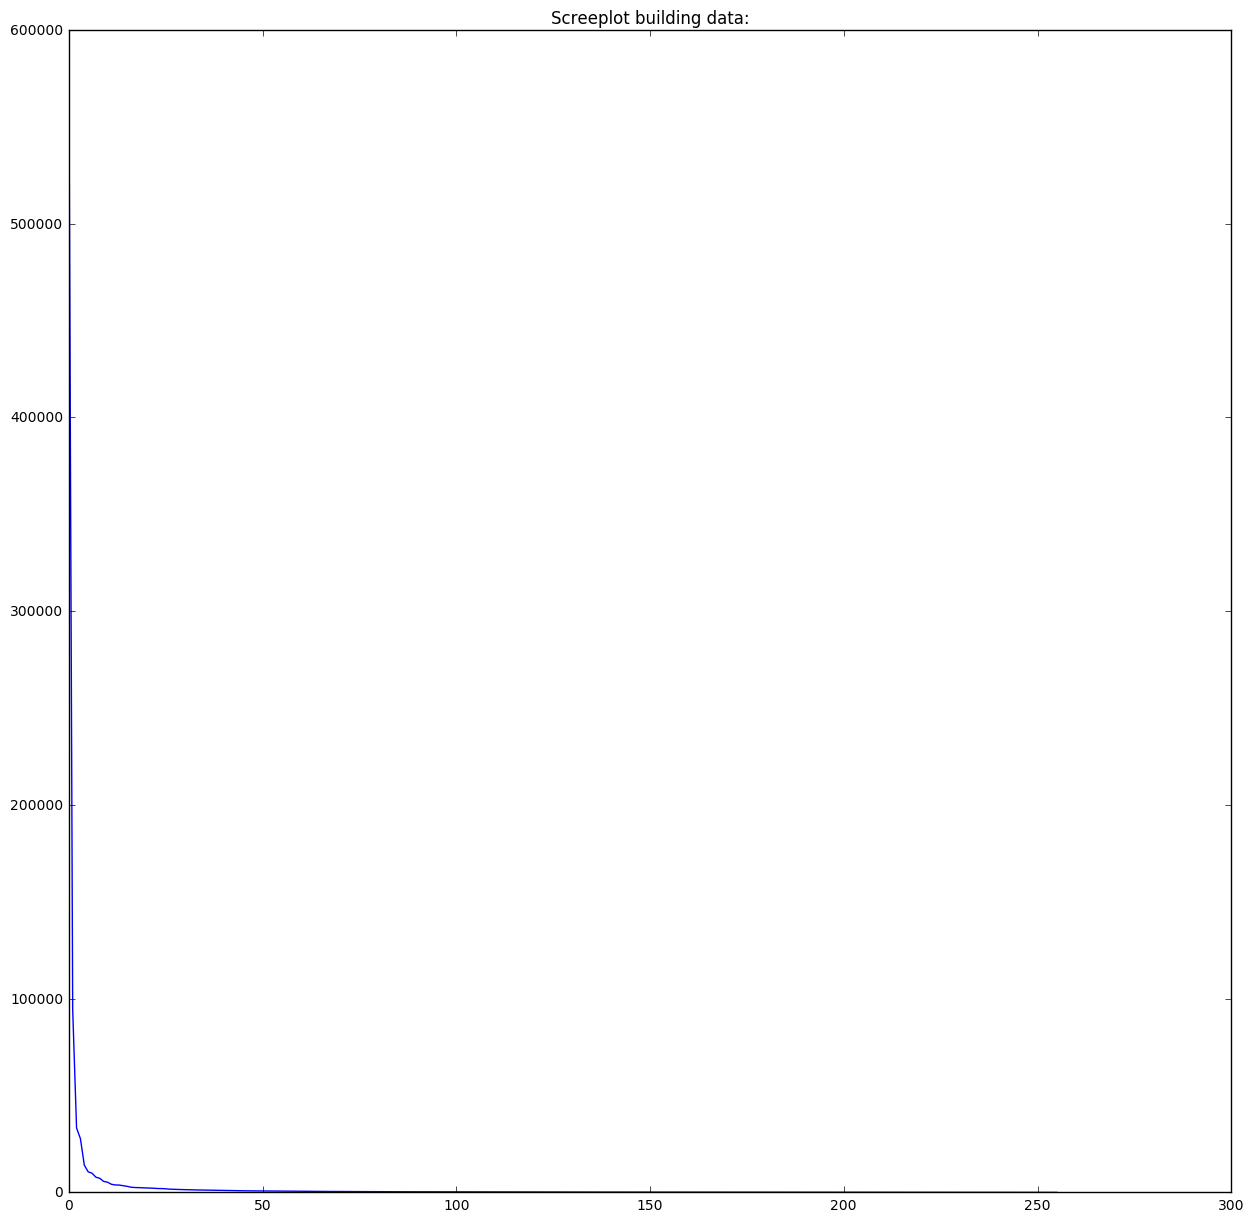

In [171]:

t = np.arange(evalues_b.shape[0])
plt.figure(figsize=(15,15))
plt.title('Screeplot building data:')
plt.plot(t,evalues_b)

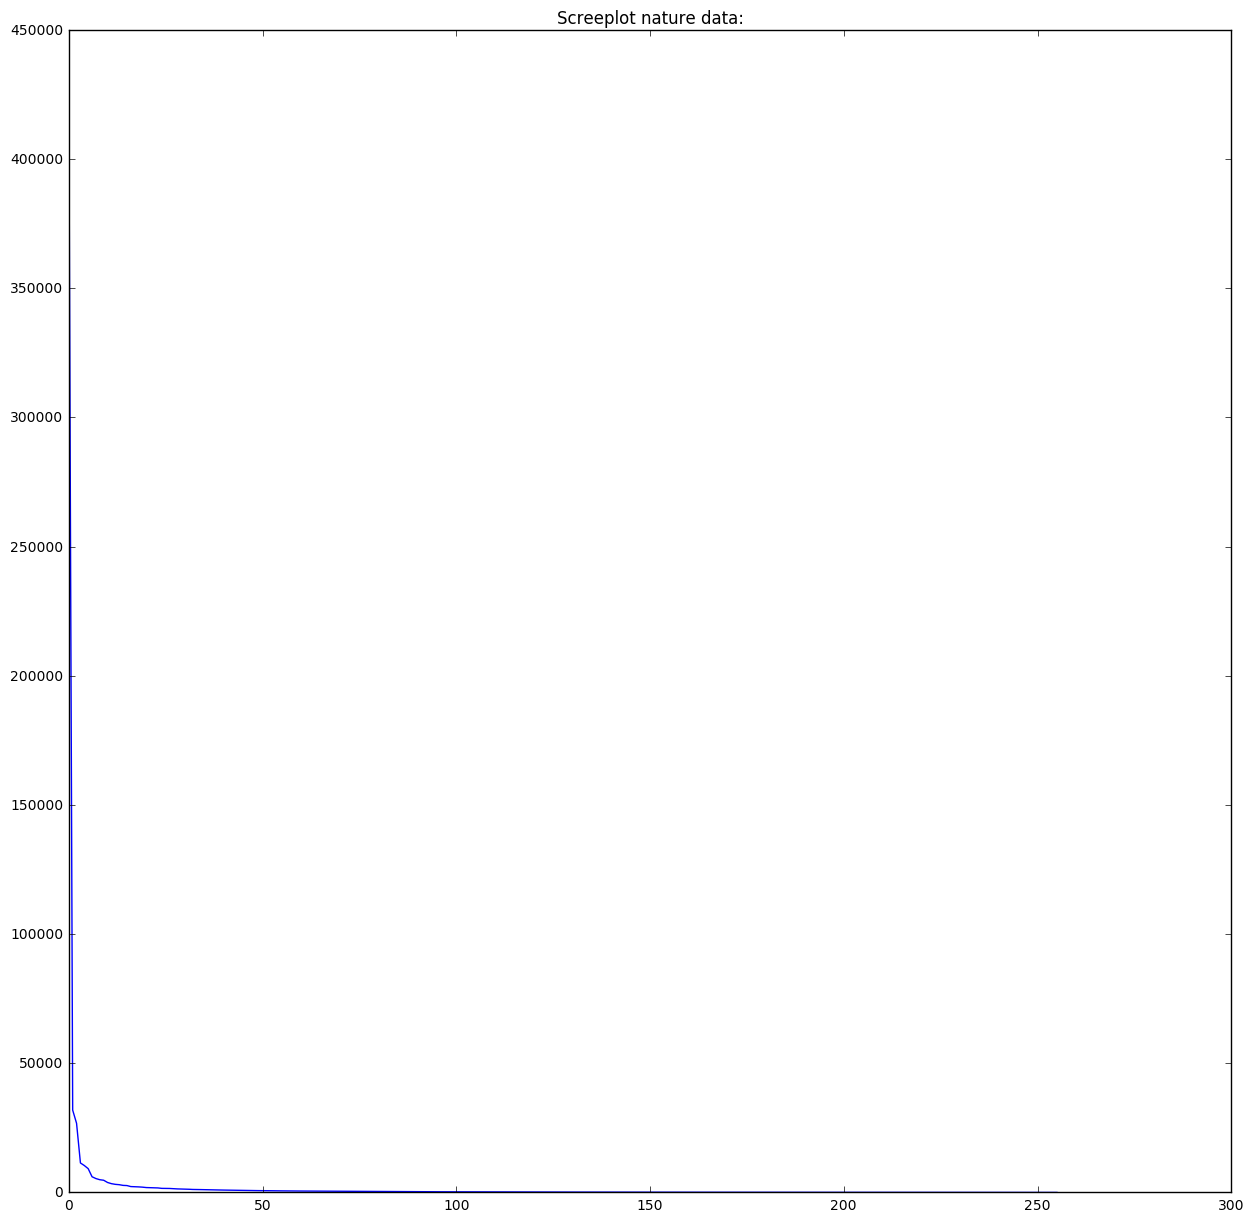

In [173]:
t = np.arange(evalues_n.shape[0])
plt.figure(figsize=(15,15))
plt.title('Screeplot nature data:')
plt.plot(t,evalues_n)